In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os
import random
import matrixprofile as mp
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import statistics
from collections import Counter
import pyarrow as pa
import pyarrow.parquet as pq
import os
from collections import OrderedDict
from scipy import stats
sns.set_style("whitegrid")

In [3]:
tempTopDir = '/Volumes/Britt_SSD/ReDoEvals3/UserStudy/'
filePath = os.path.join(tempTopDir, 'GP_Main.parquet')

In [4]:
taskDF = pd.read_parquet(filePath)
taskDF['ParticipantNum'] = taskDF["ParticipantPrivateID"]
taskDF = taskDF.astype({"ParticipantPrivateID": str})
filePath = os.path.join(tempTopDir, 'GP_Main_Short.parquet')
slimDF = pd.read_parquet(filePath)

In [5]:
# randomiser_k74v = LVL
# randomiser_8rx4 = VisCond_DIFF
# randomiser_zcqq = VisCond_EASY


# randomiser_ndwh = AgentCond_BlurVis_DIFF
# randomiser_7vb5 = AgentCond_Blur_DIFF
# randomiser_fy7r = AgentCond_Vis_DIFF
# randomiser_vfim = AgentCond_Norm_DIFF

# randomiser_l6v8 = AgentCond_BlurVis_EASY
# randomiser_dwc2 = AgentCond_Blur_EASY
# randomiser_xnr7 = AgentCond_Vis_EASY
# randomiser_9z8b = AgentCond_Norm_EASY

In [6]:
lookup = taskDF[["VisCond_DIFF","VisCond_EASY"]].notnull().idxmax(1)
taskDF = taskDF.assign(VisCond=taskDF.lookup(lookup.index, lookup.values))
taskDF['VisCond']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  


0        Blur_Plus_Vis
1        Blur_Plus_Vis
2        Blur_Plus_Vis
3        Blur_Plus_Vis
4        Blur_Plus_Vis
             ...      
75810          Blurred
75811          Blurred
75812          Blurred
75813          Blurred
75814          Blurred
Name: VisCond, Length: 75676, dtype: object

In [7]:
lookup = taskDF[["AgentCond_BlurVis_DIFF","AgentCond_Blur_DIFF","AgentCond_Vis_DIFF","AgentCond_Norm_DIFF",
                 "AgentCond_BlurVis_EASY","AgentCond_Blur_EASY","AgentCond_Vis_EASY","AgentCond_Norm_EASY"]].notnull().idxmax(1)
taskDF = taskDF.assign(AgentCond=taskDF.lookup(lookup.index, lookup.values))
taskDF['AgentCond']

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  This is separate from the ipykernel package so we can avoid doing imports until


0        300_700
1        300_700
2        300_700
3        300_700
4        300_700
          ...   
75810    300_700
75811    300_700
75812    300_700
75813    300_700
75814    300_700
Name: AgentCond, Length: 75676, dtype: object

In [8]:
filePath = os.path.join(tempTopDir, 'GP_Consent_Long.parquet')
consentDF_L = pd.read_parquet(filePath).infer_objects()
consentDF_L = consentDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
consentDF_L = consentDF_L[consentDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Consent_Short.parquet')
consentDF_S = pd.read_parquet(filePath).infer_objects()
consentDF_S = consentDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
consentDF_S = consentDF_S[consentDF_S['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Demographics_Long.parquet')
demoDF_L = pd.read_parquet(filePath).infer_objects()
demoDF_L = demoDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
demoDF_L = demoDF_L[demoDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Demographics_Short.parquet')
demoDF_S = pd.read_parquet(filePath).infer_objects()
demoDF_S = demoDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
demoDF_S = demoDF_S[demoDF_S['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_AI_Long.parquet')
aiDF_L = pd.read_parquet(filePath).infer_objects()
aiDF_L = aiDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
aiDF_L = aiDF_L[aiDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_AI_Short.parquet')
aiDF_S = pd.read_parquet(filePath).infer_objects()
aiDF_S = aiDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
aiDF_S = aiDF_S[aiDF_S['ParticipantPrivateID'].notna()]

In [9]:
demoDF_L.columns

Index(['EventIndex', 'UTCTimestamp', 'UTCDate', 'LocalTimestamp',
       'LocalTimezone', 'LocalDate', 'ExperimentID', 'ExperimentVersion',
       'TreeNodeKey', 'RepeatKey', 'ScheduleID', 'ParticipantPublicID',
       'ParticipantPrivateID', 'ParticipantStartingGroup', 'ParticipantStatus',
       'ParticipantCompletionCode', 'ParticipantExternalSessionID',
       'ParticipantDeviceType', 'ParticipantDevice', 'ParticipantOS',
       'ParticipantBrowser', 'ParticipantMonitorSize',
       'ParticipantViewportSize', 'Checkpoint', 'TaskName', 'TaskVersion',
       'randomiser_8rx4', 'randomiser_ndwh', 'randomiser_fy7r',
       'randomiser_7vb5', 'checkpoint_ph4w', 'checkpoint_drrq',
       'randomiser_vfim', 'checkpoint_6gsl', 'checkpoint_apgi',
       'randomiser_k74v', 'randomiser_zcqq', 'randomiser_9z8b',
       'randomiser_xnr7', 'randomiser_l6v8', 'randomiser_dwc2',
       'Randomisequestionnaireelements?', 'QuestionKey', 'Response',
       'branch_4zei', 'age_info', 'age_info_text', 

In [10]:
aiDF_S.columns

Index(['EventIndex', 'UTCTimestamp', 'UTCDate', 'LocalTimestamp',
       'LocalTimezone', 'LocalDate', 'ExperimentID', 'ExperimentVersion',
       'TreeNodeKey', 'RepeatKey', 'ScheduleID', 'ParticipantPublicID',
       'ParticipantPrivateID', 'ParticipantStartingGroup', 'ParticipantStatus',
       'ParticipantCompletionCode', 'ParticipantExternalSessionID',
       'ParticipantDeviceType', 'ParticipantDevice', 'ParticipantOS',
       'ParticipantBrowser', 'ParticipantMonitorSize',
       'ParticipantViewportSize', 'Checkpoint', 'TaskName', 'TaskVersion',
       'randomiser_8rx4', 'randomiser_ndwh', 'randomiser_fy7r',
       'randomiser_7vb5', 'checkpoint_ph4w', 'checkpoint_drrq',
       'randomiser_vfim', 'checkpoint_6gsl', 'checkpoint_apgi',
       'randomiser_k74v', 'randomiser_zcqq', 'randomiser_9z8b',
       'randomiser_xnr7', 'randomiser_l6v8', 'randomiser_dwc2',
       'Randomisequestionnaireelements?', 'ai_involvement_1',
       'ai_involvement_2', 'ai_involvement_3', 'ai_involve

In [11]:
len(demoDF_L.ParticipantPrivateID.unique())

246

In [12]:
len(taskDF.ParticipantPrivateID.unique())

245

In [13]:
taskDF.columns

Index(['EventIndex', 'UTCTimestamp', 'UTCDate', 'LocalTimestamp',
       'LocalTimezone', 'LocalDate', 'ExperimentID', 'ExperimentVersion',
       'TreeNodeKey', 'RepeatKey', 'ScheduleID', 'ParticipantPublicID',
       'ParticipantPrivateID', 'ParticipantStartingGroup', 'ParticipantStatus',
       'ParticipantCompletionCode', 'ParticipantExternalSessionID',
       'ParticipantDeviceType', 'ParticipantDevice', 'ParticipantOS',
       'ParticipantBrowser', 'ParticipantMonitorSize',
       'ParticipantViewportSize', 'Checkpoint', 'TaskName', 'TaskVersion',
       'VisCond_DIFF', 'AgentCond_BlurVis_DIFF', 'AgentCond_Vis_DIFF',
       'AgentCond_Blur_DIFF', 'checkpoint_ph4w', 'checkpoint_drrq',
       'AgentCond_Norm_DIFF', 'checkpoint_6gsl', 'checkpoint_apgi', 'LVL',
       'VisCond_EASY', 'AgentCond_Norm_EASY', 'AgentCond_Vis_EASY',
       'AgentCond_BlurVis_EASY', 'AgentCond_Blur_EASY', 'Spreadsheet',
       'SpreadsheetName', 'SpreadsheetRow', 'TrialNumber', 'ScreenNumber',
       'Scre

In [14]:
# print(taskDF[taskDF['Text1']=="<h2>That's it for Ms. Pacman, but before you go, we'd like to know how you feel about self-driving cars.</h2>"])

      
      
# print(taskDF.query('Likert_Num==0.0')['Text1'].unique()) 
df = taskDF.copy()
# df2 = df[df['Text1'].str.contains("", na=False)]
# print(df2['Text1'].unique())

# print(df[df['display']=="WrapUpLikert"][['Response','ZoneType','ScreenName']])
# taskDF.query('display=="WrapUpLikert" & ScreenName=="Screen 1"')['Text1'] = "<h3>Thinking about AI in general, if you needed to buy a car in the next five years, how likely would you be to seek out drive-assist capabilities in your next car?</h3>"


df['Text1'] = np.where((df.display=="WrapUpLikert")&(df.ScreenName=="Screen 1"),\
   "<h3>Thinking about AI in general, if you needed to buy a car in the next five years, how likely would you be to seek out drive-assist capabilities in your next car?</h3>",\
   df.Text1)

df['ZoneName'] = np.where((df.display=="WrapUpLikert")&(df.ScreenName=="Screen 1"),\
   "Car_Original",\
   df.ZoneName)

df['Text1'] = np.where((df.display=="WrapUpLikert")&(df.ScreenName=="Screen 2"),\
    "<h3>How might it influence your likelihood of seeking out drive assist technologies in your future car if you knew the car could explain all its decisions to you upon request?</h3>",\
    df.Text1)

df['ZoneName'] = np.where((df.display=="WrapUpLikert")&(df.ScreenName=="Screen 2"),\
   "Car_Explainable",\
   df.ZoneName)

print(df.query('display=="WrapUpLikert" & ScreenName=="Screen 2"')['Text1'].unique())


['<h3>How might it influence your likelihood of seeking out drive assist technologies in your future car if you knew the car could explain all its decisions to you upon request?</h3>']


In [22]:
tmp = df.query('display=="WrapUpLikert" & ScreenName=="Screen 1"')[['ParticipantPublicID','Response']]
tmp['Car_Original_Response'] = tmp['Response']
print(tmp.drop(columns='Response',inplace=True))

tmp_slimDF = pd.merge(slimDF, tmp, on="ParticipantPublicID")

# print(tmp_slimDF)

tmp = df.query('display=="WrapUpLikert" & ScreenName=="Screen 2"')[['ParticipantPublicID','Response']]
tmp['Car_Explainable_Response'] = tmp['Response']
print(tmp.drop(columns='Response',inplace=True))

tmp_slimDF = pd.merge(tmp_slimDF, tmp, on="ParticipantPublicID")

print(tmp_slimDF)

None
None
    ParticipantPrivateID difficulty        visuals   agents  QsTotal  \
0              3109877.0  Difficult  Blur_Plus_Vis  300_700       20   
1              3109883.0       Easy        Visuals   23_700       20   
2              3109878.0       Easy        Blurred   700_23       20   
3              3135747.0  Difficult  Blur_Plus_Vis  700_300       20   
4              3160810.0  Difficult  Blur_Plus_Vis  s23_p23       20   
..                   ...        ...            ...      ...      ...   
230            3499590.0       Easy        Blurred   700_23       20   
231            3532505.0       Easy        Visuals   300_23       20   
232            3532499.0       Easy  Blur_Plus_Vis   700_23       20   
233            3532504.0  Difficult        Visuals  700_300       20   
234            3534721.0  Difficult        Blurred  300_700       20   

     QsCorrect  Agent_QsTotal  Agent_QsCorrect  Agent_QsWO_GhostsTotal  \
0          5.0             16              4.0     

In [33]:
print(tmp_slimDF["Car_Original_Response"].unique())
datamap = {
    "Would Not": 1, 
    "Unlikely": 2, 
    "No Preference": 3, 
    "Likely": 4, 
    "Absolutely": 5
}
tmp_slimDF['Car_Original_Rating'] = tmp_slimDF.Car_Original_Response.map(datamap.get)
print(tmp_slimDF['Car_Original_Rating'])



# print(df.query('ZoneName=="Car_Explainable"')['Response'].unique())
datamap = {
    'Decrease by a lot': 1, 
    'Decrease a little': 2, 
    'No change': 3, 
    'Increase by a little': 4, 
    'Increase by a lot': 5
}
tmp_slimDF['Car_Explainable_Rating'] = tmp_slimDF.Car_Explainable_Response.map(datamap.get)
print(tmp_slimDF['Car_Explainable_Rating'].unique())

['Likely' 'No Preference' 'Unlikely' 'Would Not' 'Absolutely']
0      4
1      4
2      4
3      4
4      3
      ..
230    1
231    2
232    4
233    4
234    3
Name: Car_Original_Rating, Length: 235, dtype: int64
[5 4 3 1 2]


<AxesSubplot:>

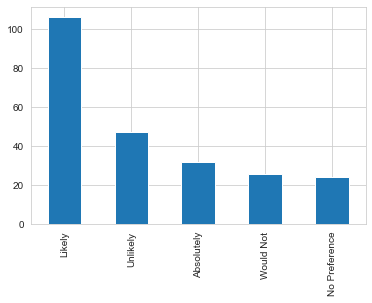

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1)
tmp_slimDF.Car_Original_Response.value_counts().plot(kind='bar', ax=ax)

<AxesSubplot:>

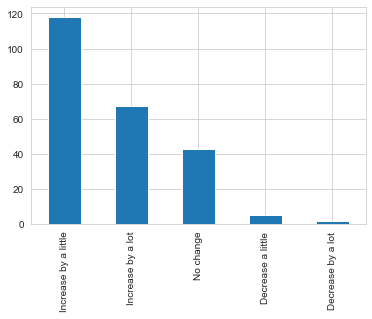

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1)
tmp_slimDF.Car_Explainable_Response.value_counts().plot(kind='bar', ax=ax)

In [42]:
slimDF = tmp_slimDF.copy()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


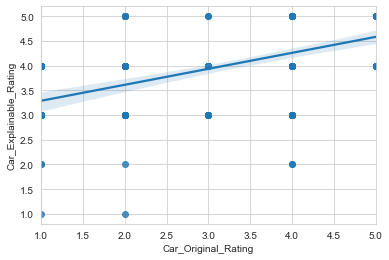

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


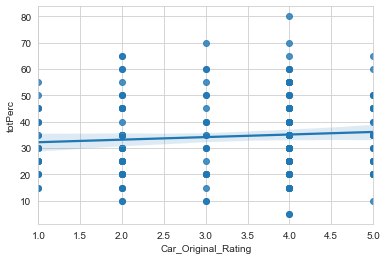

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


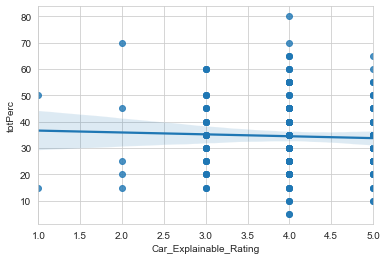

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


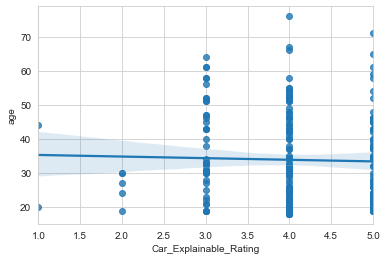

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


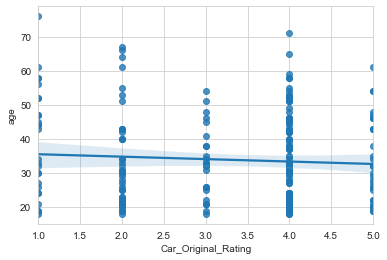

In [43]:
sns.regplot('Car_Original_Rating', 'Car_Explainable_Rating', data=tmp_slimDF)
plt.show()

sns.regplot('Car_Original_Rating', 'totPerc', data=slimDF)
plt.show()

sns.regplot('Car_Explainable_Rating', 'totPerc', data=slimDF)
plt.show()

sns.regplot('Car_Explainable_Rating', 'age', data=slimDF)
plt.show()

sns.regplot('Car_Original_Rating', 'age', data=slimDF)
plt.show()



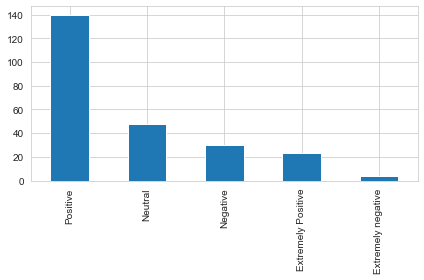

In [44]:
datamap = {
    1: "Extremely negative", 
    2: "Negative", 
    3: "Neutral", 
    4: "Positive", 
    5: "Extremely Positive"
}


aiDF_S['AIrating'] = aiDF_S.ai_opinion_quantised.map(datamap.get)
slimDF['AIrating'] = slimDF.ai_opinion_quantised.map(datamap.get)

fig, ax = plt.subplots()
aiDF_S.AIrating.value_counts().plot(kind='bar', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


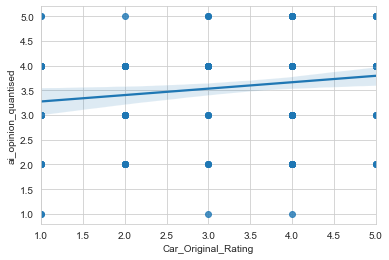

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


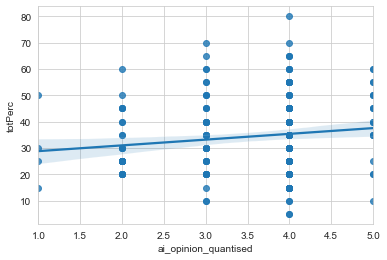

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


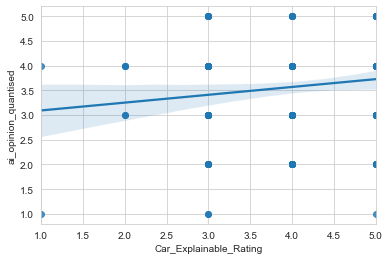

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


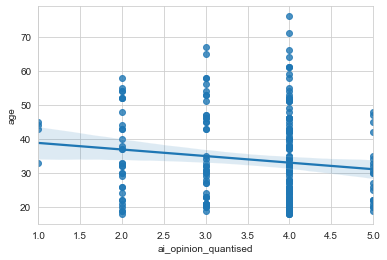

In [45]:
sns.regplot('Car_Original_Rating', 'ai_opinion_quantised', data=tmp_slimDF)
plt.show()

sns.regplot('ai_opinion_quantised', 'totPerc', data=slimDF)
plt.show()

sns.regplot('Car_Explainable_Rating', 'ai_opinion_quantised', data=slimDF)
plt.show()

sns.regplot('ai_opinion_quantised', 'age', data=slimDF)
plt.show()

# sns.regplot('Car_Original_Rating', 'age', data=slimDF)
# plt.show()

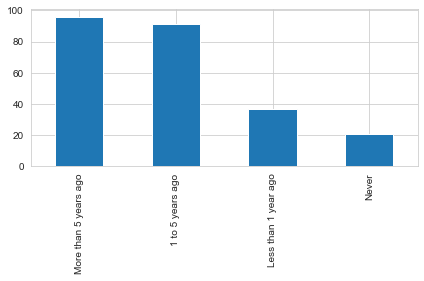

In [14]:
datamap = {
    1: "Less than 1 year ago",  
    2: "1 to 5 years ago",  
    3: "More than 5 years ago",  
    4: "Never"
}


aiDF_S['PMrating'] = aiDF_S.pacman_experience_quantised.map(datamap.get)

fig, ax = plt.subplots()
aiDF_S.PMrating.value_counts().plot(kind='bar', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()

F            121
M            121
No Answer      1
Name: gender_rating, dtype: int64


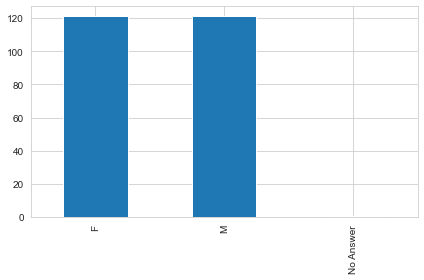

In [15]:
datamap = {
    1: "M",  
    2: "F",  
    3: "No Answer",  
    4: "Other"
}


demoDF_S['gender_rating'] = demoDF_S.gender_id_quantised.map(datamap.get)

print(demoDF_S.gender_rating.value_counts())

fig, ax = plt.subplots()
demoDF_S.gender_rating.value_counts().plot(kind='bar', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()

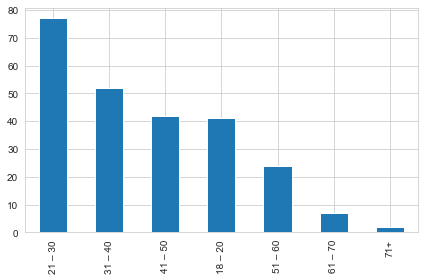

In [16]:
datamap = {
    1: "18 – 20",  
    2: '21 – 30',   
    3: '31 – 40',   
    4: '41 – 50',  
    5: '51 – 60', 
    6: '61 – 70',  
    7: '71+'
}


demoDF_S['age_rating'] = demoDF_S.age_info_quantised.map(datamap.get)

fig, ax = plt.subplots()
demoDF_S.age_rating.value_counts().plot(kind='bar', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()

gender_rating     F     M  No Answer
age_rating                          
18 – 20        24.0  29.0        NaN
21 – 30        84.0  32.0        3.0
31 – 40        64.0  20.0        NaN
41 – 50        44.0  20.0        NaN
51 – 60        20.0  14.0        NaN
61 – 70         6.0   4.0        NaN
71+             NaN   2.0        NaN
gender_rating     F     M  No Answer
age_rating                          
18 – 20        12.0  29.0        NaN
21 – 30        84.0  64.0        2.0
31 – 40        96.0  60.0        NaN
41 – 50        88.0  80.0        NaN
51 – 60        50.0  70.0        NaN
61 – 70        18.0  24.0        NaN
71+             NaN  14.0        NaN


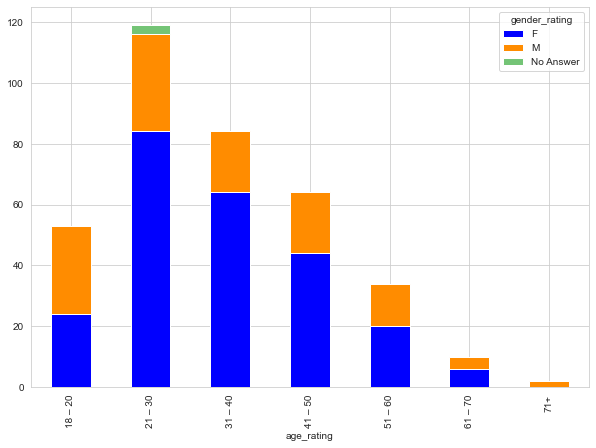

In [18]:

colors = ["blue","darkorange", "#74C476"]
df = demoDF_S.groupby(['age_rating','gender_rating']).sum().unstack().add_prefix('')
print(df['gender_id_quantised'])
print(df['age_info_quantised'])
df['gender_id_quantised'].plot(kind="bar",stacked=True, figsize=(10,7), color=colors)
plt.savefig('/Users/byrdsmyth/iCloud/Documents/School/Thesis/WSU_Thesis_Latex/Figures/AgeGenderGraph.png')
plt.show()
# df['param_age_info_quantised'].plot(kind="bar",stacked=True, figsize=(10,7), color=colors)

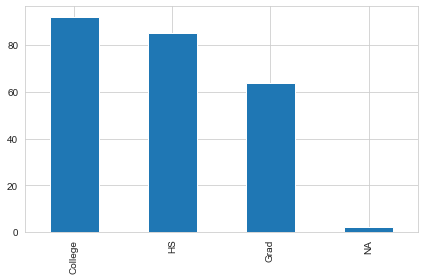

In [19]:
datamap = {
    1: "HS",  
    2: "College",   
    3: "Grad",   
    4: "NA",  
    5: "Other"
}


demoDF_S['edu_rating'] = demoDF_S.education_level_quantised.map(datamap.get)
a
fig, ax = plt.subplots()
demoDF_S.edu_rating.value_counts().plot(kind='hist', ax=ax)
## alternatively:
# aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
fig.tight_layout()

[None 'I videos about using and implementing AI' 'Informal interest']


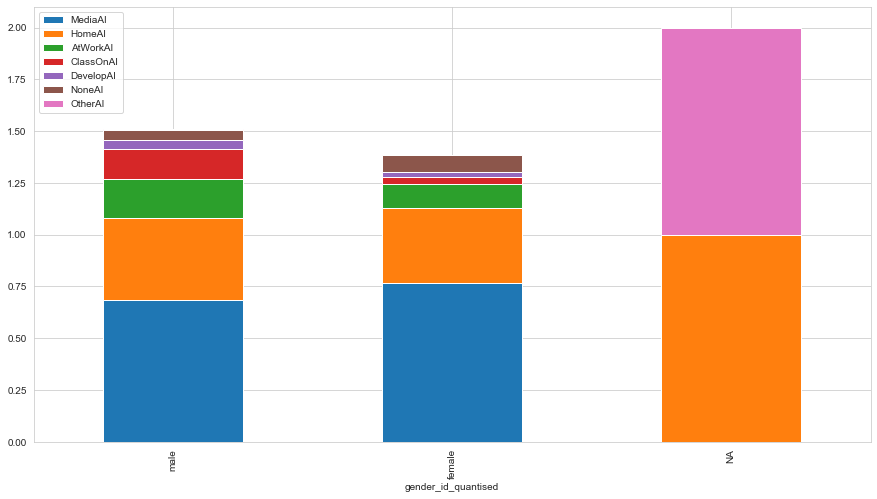

In [20]:
tmp = slimDF[['MediaAI','HomeAI','AtWorkAI','ClassOnAI','ai_involvement_4','DevelopAI','NoneAI','OtherAI','gender_id_quantised']]

ax = tmp.groupby('gender_id_quantised').mean().plot(kind="bar", stacked=True, figsize=(15,8))
ax.set_xticklabels(['male','female','NA'])

print(slimDF.ai_involvement_text.unique())

In [48]:
print(slimDF.visuals.unique())
No = slimDF[slimDF['Car_Original_Rating']==1] 
No_Maybe =  slimDF[slimDF['Car_Original_Rating']==2] 
IDK =  slimDF[slimDF['Car_Original_Rating']==3]  
Yes_Maybe = slimDF[slimDF['Car_Original_Rating']==4] 
Yes = slimDF[slimDF['Car_Original_Rating']==5] 

print("Vis v BlurVis")
print(stats.ttest_ind(No['totPerc'], No_Maybe['totPerc']))
print("BlurVis v Blur")
print(stats.ttest_ind(No_Maybe['totPerc'], IDK['totPerc']))
print("Vid v BlurVis")
print(stats.ttest_ind(IDK['totPerc'], Yes_Maybe['totPerc']))
print("Vis v Blur")
print(stats.ttest_ind(Yes_Maybe['totPerc'], Yes['totPerc']))
print("Vis v Vid")
print(stats.ttest_ind(Yes['totPerc'], No['totPerc']))

['Blur_Plus_Vis' 'Visuals' 'Blurred' 'Video']
Vis v BlurVis
Ttest_indResult(statistic=-0.5146866621597959, pvalue=0.6083705515640165)
BlurVis v Blur
Ttest_indResult(statistic=-0.36641809044795076, pvalue=0.7151743062566687)
Vid v BlurVis
Ttest_indResult(statistic=-0.3003662985325619, pvalue=0.7643850553728873)
Vis v Blur
Ttest_indResult(statistic=0.2618227202991653, pvalue=0.793854248462871)
Vis v Vid
Ttest_indResult(statistic=1.049835871858714, pvalue=0.2983032104938319)


In [49]:
print(slimDF.visuals.unique())
No2 = slimDF[slimDF['Car_Explainable_Rating']==1] 
No_Maybe2 =  slimDF[slimDF['Car_Explainable_Rating']==2] 
IDK2 =  slimDF[slimDF['Car_Explainable_Rating']==3]  
Yes_Maybe2 = slimDF[slimDF['Car_Explainable_Rating']==4] 
Yes2 = slimDF[slimDF['Car_Explainable_Rating']==5] 

print("Vis v BlurVis")
print(stats.ttest_ind(No2['totPerc'], No_Maybe['totPerc']))
print("BlurVis v Blur")
print(stats.ttest_ind(No_Maybe2['totPerc'], IDK['totPerc']))
print("Vid v BlurVis")
print(stats.ttest_ind(IDK2['totPerc'], Yes_Maybe['totPerc']))
print("Vis v Blur")
print(stats.ttest_ind(Yes_Maybe2['totPerc'], Yes['totPerc']))
print("Vis v Vid")
print(stats.ttest_ind(Yes2['totPerc'], No['totPerc']))
# print("Vid v BlurVis")
# print(stats.ttest_ind(Blurred['totPerc'], Video['totPerc']))

['Blur_Plus_Vis' 'Visuals' 'Blurred' 'Video']
Vis v BlurVis
Ttest_indResult(statistic=-0.0657132416572267, pvalue=0.9478848564110728)
BlurVis v Blur
Ttest_indResult(statistic=0.047781444221215774, pvalue=0.9622421146378686)
Vid v BlurVis
Ttest_indResult(statistic=-0.13543454927031692, pvalue=0.8924535882248887)
Vis v Blur
Ttest_indResult(statistic=-0.004633975334672398, pvalue=0.996308876175396)
Vis v Vid
Ttest_indResult(statistic=0.6466013293002573, pvalue=0.5195175357009072)


In [50]:
print("Vis v BlurVis")
print(stats.ttest_ind(No['totPerc'], No2['totPerc']))
print("BlurVis v Blur")
print(stats.ttest_ind(No_Maybe2['totPerc'], No_Maybe['totPerc']))
print("Vid v BlurVis")
print(stats.ttest_ind(IDK2['totPerc'], IDK['totPerc']))
print("Vis v Blur")
print(stats.ttest_ind(Yes_Maybe2['totPerc'], Yes_Maybe['totPerc']))
print("Vis v Vid")
print(stats.ttest_ind(Yes2['totPerc'], Yes['totPerc']))
# print("Vid v BlurVis")
# print(stats.ttest_ind(Blurred['totPerc'], Video['totPerc']))

Vis v BlurVis
Ttest_indResult(statistic=-0.11292297753034077, pvalue=0.9109590065179674)
BlurVis v Blur
Ttest_indResult(statistic=0.2543788529445879, pvalue=0.8002461739994605)
Vid v BlurVis
Ttest_indResult(statistic=0.17783581307865645, pvalue=0.8594049780543501)
Vis v Blur
Ttest_indResult(statistic=-0.38302593363727283, pvalue=0.7020670357087235)
Vis v Vid
Ttest_indResult(statistic=-0.5917637355339357, pvalue=0.555385528324162)


In [21]:
# From: https://benalexkeen.com/comparative-statistics-in-python-using-scipy/

# Our null hypothesis in this case is that there is no statistically significant difference in the mean of 
# male consulting doctors and junior resident female doctors.

# thisDF = tmp_slimDF.copy()

print(slimDF.visuals.unique())
Blur_Plus_Vis = slimDF[slimDF['visuals']=='Blur_Plus_Vis'] 
Visuals =  slimDF[slimDF['visuals']=='Visuals'] 
Blurred =  slimDF[slimDF['visuals']=='Blurred'] 
Video = slimDF[slimDF['visuals']=='Video'] 

print("Vis v BlurVis")
print(stats.ttest_ind(Blur_Plus_Vis['totPerc'], Visuals['totPerc']))
print("BlurVis v Blur")
print(stats.ttest_ind(Blur_Plus_Vis['totPerc'], Blurred['totPerc']))
print("Vid v BlurVis")
print(stats.ttest_ind(Blur_Plus_Vis['totPerc'], Video['totPerc']))
print("Vis v Blur")
print(stats.ttest_ind(Visuals['totPerc'], Blurred['totPerc']))
print("Vis v Vid")
print(stats.ttest_ind(Visuals['totPerc'], Video['totPerc']))
print("Vid v BlurVis")
print(stats.ttest_ind(Blurred['totPerc'], Video['totPerc']))

['Blur_Plus_Vis' 'Visuals' 'Blurred' 'Video']
Vis v BlurVis
Ttest_indResult(statistic=-4.369772786566169, pvalue=2.6293688711165965e-05)
BlurVis v Blur
Ttest_indResult(statistic=3.3526711721968936, pvalue=0.001066331943882316)
Vid v BlurVis
Ttest_indResult(statistic=0.8933613770669752, pvalue=0.37340828004142423)
Vis v Blur
Ttest_indResult(statistic=7.747436336056429, pvalue=3.106011828128417e-12)
Vis v Vid
Ttest_indResult(statistic=5.435670254616618, pvalue=2.812165046906448e-07)
Vid v BlurVis
Ttest_indResult(statistic=-2.6416492706897303, pvalue=0.009321695420335594)


In [22]:
print("Vis v BlurVis")
print(stats.ttest_rel(Blur_Plus_Vis['totPerc'], Visuals['totPerc']))
print("BlurVis v Blur")
print(stats.ttest_rel(Blur_Plus_Vis['totPerc'], Blurred['totPerc']))
# print("Vid v BlurVis")
# print(stats.ttest_rel(Blur_Plus_Vis['totPerc'], Video['totPerc']))
print("Vis v Blur")
print(stats.ttest_rel(Visuals['totPerc'], Blurred['totPerc']))
# print("Vis v Vid")
# print(stats.ttest_rel(Visuals['totPerc'], Video['totPerc']))
# print("Vid v BlurVis")
# print(stats.ttest_rel(Blurred['totPerc'], Video['totPerc']))

Vis v BlurVis
Ttest_relResult(statistic=-4.162195877979567, pvalue=0.00010052478937654634)
BlurVis v Blur
Ttest_relResult(statistic=3.5613338504287833, pvalue=0.0007225597983077951)
Vis v Blur
Ttest_relResult(statistic=8.02537424439837, pvalue=3.9780233544316395e-11)


In [23]:
# While you could do multiple T-tests, as you increase the numbers of T-tests you do, you are more likely to 
# encounter a Type I error. If you have a p value of 0.05 for each T-test, once you have run three T-tests, 
# your p is effectively 0.143. ANOVA controls for this error such that the Type I error rate remains at 5%.
print(stats.f_oneway(Blur_Plus_Vis['totPerc'], Visuals['totPerc'],Blurred['totPerc'], Video['totPerc']))

print(stats.f_oneway(Visuals['totPerc'],Blurred['totPerc'], Video['totPerc']))

print(stats.f_oneway(Blur_Plus_Vis['totPerc'], Visuals['totPerc'],Blurred['totPerc']))

F_onewayResult(statistic=22.96539433027693, pvalue=3.9015131079899815e-13)
F_onewayResult(statistic=35.00390972257761, pvalue=1.310110057261779e-13)
F_onewayResult(statistic=30.725081504317338, pvalue=3.1250675203720124e-12)


/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


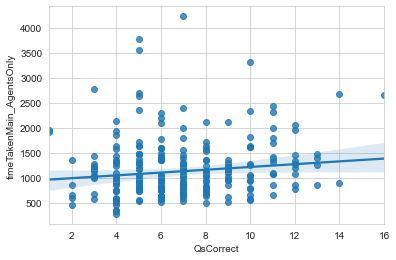

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


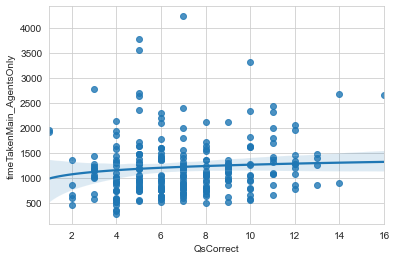

In [28]:
sns.regplot('QsCorrect','timeTakenMain_AgentsOnly',data=slimDF, ci=99, robust=True)
plt.show()

sns.regplot('QsCorrect','timeTakenMain_AgentsOnly',data=slimDF, ci=99, logx=True)
plt.show()

In [30]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


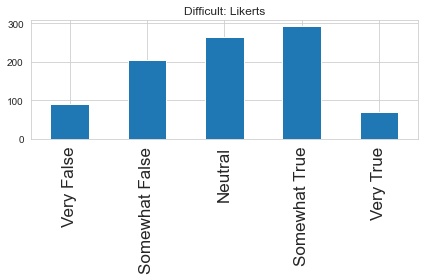

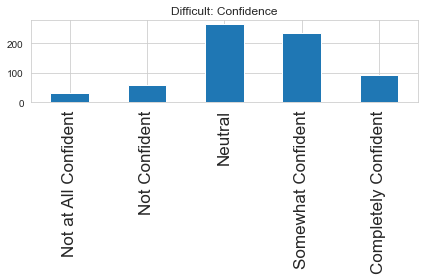

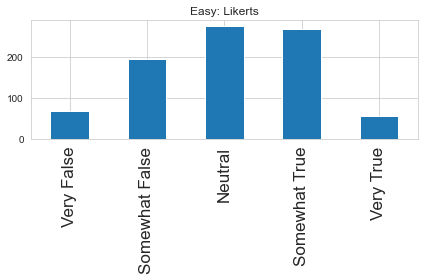

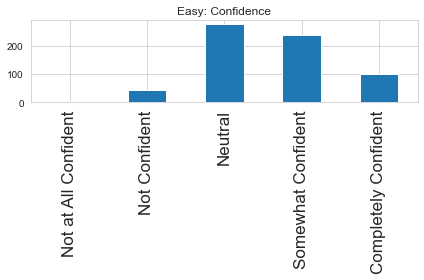

In [44]:
for lvl_index, lvl in enumerate(taskDF.LVL.unique()):
    temp = taskDF[taskDF['LVL']==lvl]
    
    temp.likertCatVar = pd.Categorical(temp.Response, categories=['Very False','Somewhat False','Neutral','Somewhat True','Very True'], ordered=True)

    temp.confCatVar = pd.Categorical(temp.Response, categories=['Not at All Confident','Not Confident','Neutral','Somewhat Confident','Completely Confident'], ordered=True)

    if len(temp) > 0:
        fig, ax = plt.subplots()
        temp.likertCatVar.value_counts().plot(kind="bar", ax=ax)
        ax.set_title(temp.LVL.unique()[0] + ": Likerts")
        ## alternatively:
        # aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
        fig.tight_layout()
        
        fig, ax = plt.subplots()
        temp.confCatVar.value_counts().plot(kind="bar", ax=ax)
        ax.set_title(temp.LVL.unique()[0] + ": Confidence")
        ## alternatively:
        # aiDF_S.groupby(by='AIrating').count().plot(kind='bar', ax=ax)
        fig.tight_layout()

In [52]:
tempDir = '/Volumes/Britt_SSD/ReDoEvals3/'
tempTopDir = os.path.join(tempDir, 'UserStudy')
if not os.path.isdir(tempTopDir):
    os.mkdir(tempTopDir)
tempTopDir = os.path.join(tempDir, 'UserStudy')

# Write Short Task DF to parquet:
filePath = os.path.join(tempTopDir, 'GP_Main_Short.parquet')
# mainDF.to_parquet(path=filePath,compression='brotli')
table = pa.Table.from_pandas(slimDF, safe=False)
# Parquet with Brotli compression
pq.write_table(table, filePath, compression='BROTLI')